In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


# Seed Data

In [2]:
train_data=pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test_data=pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


# Cleaning Data

In [3]:
#lower case
train_data['text']=train_data['text'].str.lower()
test_data['text']=test_data['text'].str.lower()
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1
1,4,NaN,NaN,forest fire near la ronge sask. canada,1
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1


In [4]:
#remove link
import re

def remove_link(text):
    link = re.compile(r'https?://\S+|www\.\S+')
    return link.sub(r'', text)

train_data['text']=train_data['text'].apply(remove_link)
test_data['text']=test_data['text'].apply(remove_link)
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1
1,4,NaN,NaN,forest fire near la ronge sask. canada,1
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1


In [5]:
#remove stopword
from nltk.corpus import stopwords

def stopword_remover(text):
    stopword=stopwords.words('english')
    words=text.split(" ")
    result=[word for word in words if word not in stopword]
    return " ".join([word for word in result])

train_data['text']=train_data['text'].apply(stopword_remover)
test_data['text']=test_data['text'].apply(stopword_remover)
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason #earthquake may allah forgive us,1
1,4,NaN,NaN,forest fire near la ronge sask. canada,1
2,5,NaN,NaN,residents asked 'shelter place' notified offic...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,got sent photo ruby #alaska smoke #wildfires p...,1


In [6]:
#remove functuation
functuation=['.',',','?','!','"',':',';',"'"]
def functuation_remover(text):
    for word in text:
        if word in functuation:
            text=text.replace(word,'')
    return text
train_data['text']=train_data['text'].apply(functuation_remover)
test_data['text']=test_data['text'].apply(functuation_remover)
train_data

,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason #earthquake may allah forgive us,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,residents asked shelter place notified officer...,1
3,6,NaN,NaN,13000 people receive #wildfires evacuation ord...,1
4,7,NaN,NaN,got sent photo ruby #alaska smoke #wildfires p...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding bridge collapse nearb...,1
7609,10870,NaN,NaN,@aria_ahrary @thetawniest control wild fires c...,1
7610,10871,NaN,NaN,m194 [0104 utc]5km volcano hawaii,1
7611,10872,NaN,NaN,police investigating e-bike collided car littl...,1


In [7]:
train_data['location'].dropna()

31                         Birmingham
32      Est. September 2012 - Bristol
33                             AFRICA
34                   Philadelphia, PA
35                         London, UK
                    ...              
7575                               TN
7577           #NewcastleuponTyne #UK
7579                Vancouver, Canada
7580                          London 
7581                          Lincoln
Name: location, Length: 5080, dtype: object

# preprocessing

In [8]:
#split the data into training and validation
from sklearn.model_selection import train_test_split

y=train_data['target']
y=y.to_numpy()
x=train_data.drop('target', axis=1)

x_train, x_valid, y_train, y_valid=train_test_split(x,y, 
                                                    train_size=0.8,  
                                                    random_state=42)

In [9]:
x_valid

,id,keyword,location,text
2644,3796,destruction,NaN,new weapon cause un-imaginable destruction
2227,3185,deluge,NaN,f$&amp@ing things #gishwhes got soaked deluge ...
5448,7769,police,UK,dt @georgegalloway rt @galloway4mayor ûïthe c...
132,191,aftershock,NaN,aftershock back school kick great want thank e...
6845,9810,trauma,"Montgomery County, MD",response trauma children addicts develop defen...
...,...,...,...,...
1835,2640,crashed,Somewhere,@smusx16475 skype crashed u host
506,731,attacked,Arundel,christian attacked muslims temple mount waving...
3592,5131,fatal,"New South Wales, Australia",man charged fatal crash near dubbo refused bai...
6740,9657,thunderstorm,NaN,#usnwsgov severe weather statement issued augu...


In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size=100000
embedding_dim=50
max_length=40

#set up tokenizer
tokenizer=Tokenizer(oov_token='<OOV>', num_words=vocab_size)
tokenizer.fit_on_texts(x_train['text'])
word_index=tokenizer.word_index

#text to sequences and padd training data
training_sequences=tokenizer.texts_to_sequences(x_train['text'])
training_padded=pad_sequences(training_sequences, padding='post', maxlen=max_length)

#text to sequences and padd testing data
testing_sequences=tokenizer.texts_to_sequences(test_data['text'])
testing_padded=pad_sequences(testing_sequences, padding='post', maxlen=max_length)

#text to sequences and padd testing data
valid_sequences=tokenizer.texts_to_sequences(x_valid['text'])
valid_padded=pad_sequences(valid_sequences, padding='post', maxlen=max_length)

print(training_padded.shape)
print(valid_padded.shape)
print(testing_padded.shape)

(6090, 40)
(1523, 40)
(3263, 40)


# Creating and fitting Model

In [11]:
#creat the model
# in this section, we use 
import tensorflow as tf
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers 

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=training_padded.shape[1]),
    tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(3),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])
model.summary()

2022-02-22 16:35:20.954049: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 50)            5000000   
_________________________________________________________________
conv1d (Conv1D)              (None, 38, 32)            4832      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 12, 32)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                16640     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3

In [12]:
num_epochs = 50

training_padded=np.array(training_padded)
valid_padded=np.array(valid_padded)

history = model.fit(training_padded,
                    y_train,
                    batch_size=32,
                    epochs=num_epochs,
                    validation_data=(valid_padded, y_valid))


Epoch 1/50


2022-02-22 16:35:21.722252: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


191/191 [==============================] - 15s 56ms/step - loss: 0.5820 - accuracy: 0.6736 - val_loss: 0.4500 - val_accuracy: 0.8030
Epoch 2/50
191/191 [==============================] - 9s 49ms/step - loss: 0.2963 - accuracy: 0.8867 - val_loss: 0.4878 - val_accuracy: 0.7912
Epoch 3/50
191/191 [==============================] - 10s 52ms/step - loss: 0.1432 - accuracy: 0.9514 - val_loss: 0.6353 - val_accuracy: 0.7643
Epoch 4/50
191/191 [==============================] - 9s 49ms/step - loss: 0.0820 - accuracy: 0.9750 - val_loss: 0.7490 - val_accuracy: 0.7446
Epoch 5/50
191/191 [==============================] - 10s 50ms/step - loss: 0.0589 - accuracy: 0.9813 - val_loss: 0.7520 - val_accuracy: 0.7656
Epoch 6/50
191/191 [==============================] - 10s 52ms/step - loss: 0.0477 - accuracy: 0.9833 - val_loss: 0.8142 - val_accuracy: 0.7636
Epoch 7/50
191/191 [==============================] - 10s 50ms/step - loss: 0.0377 - accuracy: 0.9849 - val_loss: 0.7827 - val_accuracy: 0.7636
Epoch

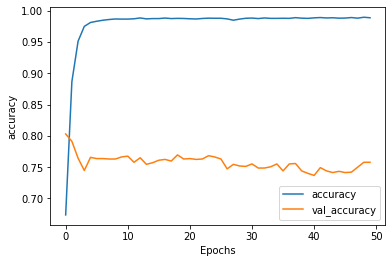

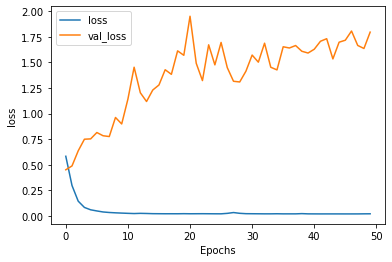

In [13]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

# Prediction for testing data

In [14]:
testing_padded=np.array(testing_padded)
pred=model.predict(testing_padded)

<AxesSubplot:xlabel='target', ylabel='count'>

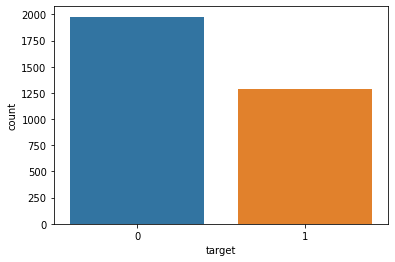

In [15]:
#make the probability that greater than 70% to be 1 and another is 0
def prediction(datas):
    result=[]
    data=np.array(datas)
    for i in range(len(data)):
        if data[i]>=0.7:
            result.append(1)
        else: result.append(0)
    return result

#prediction in 0 and 1
final_prediction=prediction(pred)

import seaborn as sns
plot = pd.DataFrame(final_prediction,columns=["target"])
sns.countplot(x="target",data=plot)

# make submission

In [16]:
output = pd.DataFrame({'id': test_data.id, 'target': final_prediction})
output.to_csv('submission.csv', index=False)
print('submission complete')

submission complete
